In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv("C:/Users/sivad/Documents/7SEM/dvp/powerconsumption.csv")

In [25]:
print("Head of the dataframe:")
print(df.head())

Head of the dataframe:
        Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3          

In [26]:
# Display information about the dataframe (data types, non-null values, etc.)
print("\nInformation about the dataframe:")
print(df.info())


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
None


In [27]:
# Handle missing values (if any)
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

In [28]:
# Convert 'Datetime' to numerical features if present
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df['Hour'] = df['Datetime'].dt.hour
    df['DayOfWeek'] = df['Datetime'].dt.dayofweek
    df.drop('Datetime', axis=1, inplace=True)  # Remove original Datetime column

In [29]:


# 2. Feature Extraction and Scaling
# Select features and target variable
features = ['Temperature', 'Humidity', 'WindSpeed', 'Hour', 'DayOfWeek']  # Add more relevant features if available
target = 'PowerConsumption_Zone1'  # Or your desired target column

X = df[features]
y = df[target]



Accuracy: 0.8402327355971003
Precision: 0.8215328467153284
Recall: 0.8659357568763224
Mean Squared Error (MSE): 18741098.329697695
Root Mean Squared Error (RMSE): 4329.099020546619
R-squared (R2): 0.6288478846117748
Mean Absolute Error (MAE): 3419.451939198768
Explained Variance Score: 0.6288956239475012


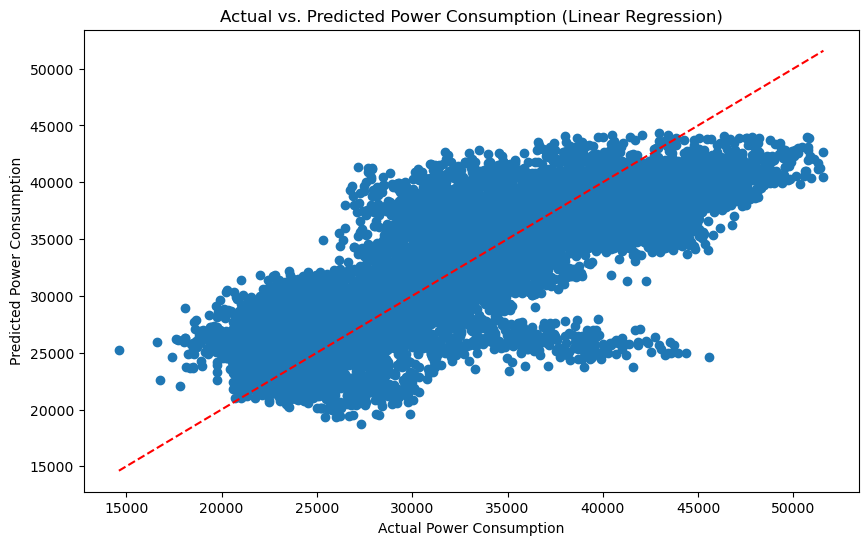

In [30]:
# Feature Scaling (using StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 3. Model Building and Training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


# 4. Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
threshold = df['PowerConsumption_Zone1'].mean()

# Create a binary classification target variable
y_classified = (y > threshold).astype(int)  # 1 if above threshold, 0 otherwise

# Split data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_scaled, y_classified, test_size=0.2, random_state=42)

# 6. Model Evaluation (Classification)
y_pred_class = (model.predict(X_test_class) > threshold).astype(int)  # Apply threshold to predictions

accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Explained Variance Score: {explained_variance}")

# 5. Visualization (Actual vs. Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Power Consumption")
plt.ylabel("Predicted Power Consumption")
plt.title("Actual vs. Predicted Power Consumption (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line
plt.show()